In [1]:
# SVM (N-1 dimensional hyperplane for N dimensional space):
    # Maximum Margin Classifier
    # Support Vector Classifier - soft margin, allows for misclassification w/n margins (more bias/ less variance)
        # Scikit learn: higher 'C' = more regularization, less allowance for error (opposite of equation representation)
    # Support Vector Machines - hyperplane doesn't work; use kernels to project data to alternate dimensions
        # Kernel function quantifies similarity between two observations; inner-product is the simplest choice
        # Kernel trick - instead of calculating values in higher D, only need to calculate pair-wise Kernel function value

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR, LinearSVR                  # LinearSVR = uses linear kernel, faster than SVR
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, plot_precision_recall_curve, confusion_matrix, classification_report, plot_confusion_matrix

In [3]:
# https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html
def plot_svm_boundary(model,X,y):
    X = X.values
    y = y.values
    
    # Scatter Plot
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30,cmap='seismic')
    
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    #plt.show()

### Classification

In [4]:
path = '../../Github/Python-Data-Science/Data/'
df = pd.read_csv(path+'mouse_viral_study.csv')

In [5]:
df.info()
# dosage of two medicines given to infected mice, and checked for virus after 2 weeks

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [6]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [7]:
df['Virus Present'].value_counts()

1    200
0    200
Name: Virus Present, dtype: int64

<AxesSubplot:xlabel='Med_1_mL', ylabel='Med_2_mL'>

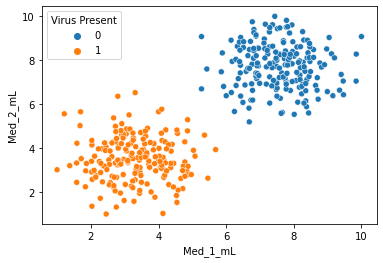

In [8]:
sns.scatterplot(data=df, x='Med_1_mL', y='Med_2_mL', hue='Virus Present')

In [9]:
# How fitting a Logistic Model would look like:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split

# X = df.drop(columns='Virus Present')
# y = df['Virus Present']

# error_in = []
# error_out = []
# coefs = []
# intercept = []

# for i in range(10):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
#     logm = LogisticRegression()
#     logm.fit(X_train,y_train)
    
#     y_pred_train = logm.predict(X_train)
#     y_pred = logm.predict(X_test)
    
#     error_in.append((y_pred_train != y_train).sum())
#     error_out.append((y_pred != y_test).sum())
#     coefs.append(logm.coef_[0])
#     intercept.append(logm.intercept_[0])
    
# print(error_in)
# print(error_out)
# pd.DataFrame(dict(intercept = intercept, coef = coefs))

In [10]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`sklearn.svm.LinearSVC` or
 |  :class:`sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  

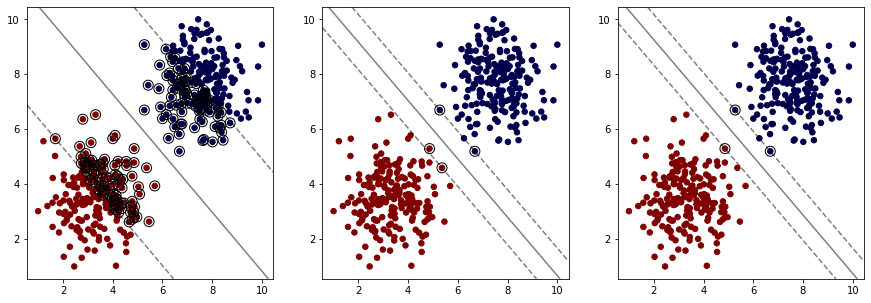

In [11]:
X = df.drop(columns='Virus Present')
y = df['Virus Present']

svc_lin1 = SVC(kernel='linear', C=.001)           # lower C = more allowance for error
svc_lin1.fit(X,y)
svc_lin2 = SVC(kernel='linear', C=1)
svc_lin2.fit(X,y)
svc_lin3 = SVC(kernel='linear', C=1000)           # Higher C = less allowance for error
svc_lin3.fit(X,y)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plot_svm_boundary(svc_lin1, X, y)

plt.subplot(1,3,2)
plot_svm_boundary(svc_lin2, X, y)

plt.subplot(1,3,3)
plot_svm_boundary(svc_lin3, X, y)

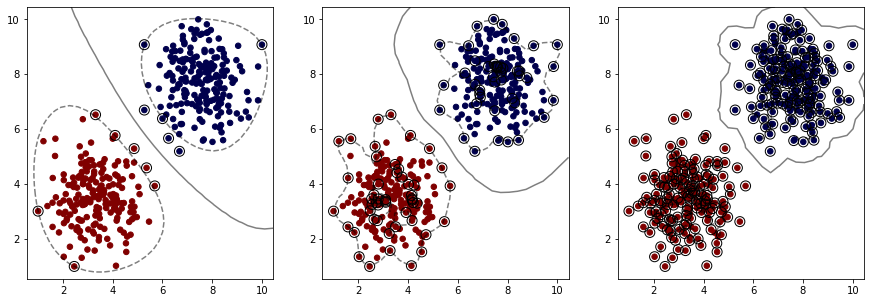

In [12]:
# https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html
# gamma defines how far the influence of a single training example reaches, with low values meaning ‘far’ 

svc_rbf1 = SVC(kernel='rbf', C=1, gamma=.1)
svc_rbf1.fit(X,y)
svc_rbf2 = SVC(kernel='rbf', C=1, gamma=1)
svc_rbf2.fit(X,y)
svc_rbf3 = SVC(kernel='rbf', C=1, gamma=10)
svc_rbf3.fit(X,y)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plot_svm_boundary(svc_rbf1, X, y)

plt.subplot(1,3,2)
plot_svm_boundary(svc_rbf2, X, y)

plt.subplot(1,3,3)
plot_svm_boundary(svc_rbf3, X, y)

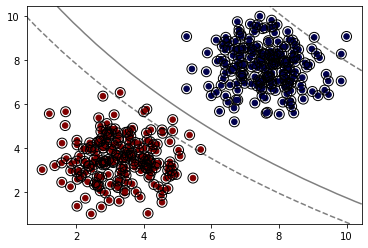

In [13]:
# Sigmoid doesn't perform well for this problem
# Notice the number of Support Points with default parameter values

svc_sig = SVC(kernel='sigmoid')
svc_sig.fit(X,y)
plot_svm_boundary(svc_sig, X, y)

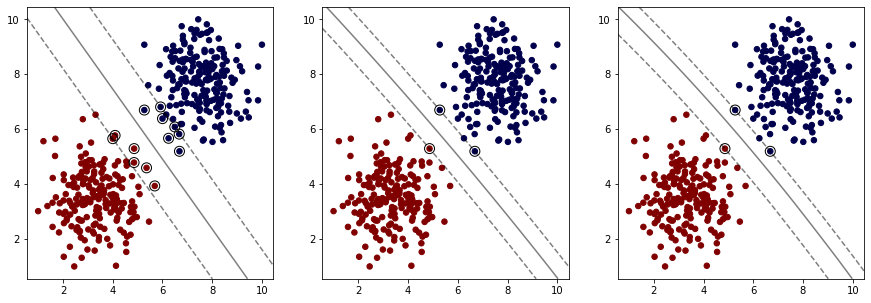

In [14]:
svc_poly1 = SVC(kernel='poly', C=1, degree=1)
svc_poly1.fit(X,y)
svc_poly2 = SVC(kernel='poly', C=1, degree=2)       # higher degrees add curvature to decision boundary
svc_poly2.fit(X,y)
svc_poly3 = SVC(kernel='poly', C=1, degree=5)
svc_poly3.fit(X,y)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plot_svm_boundary(svc_poly1, X, y)

plt.subplot(1,3,2)
plot_svm_boundary(svc_poly2, X, y)

plt.subplot(1,3,3)
plot_svm_boundary(svc_poly3, X, y)

In [15]:
param_grid = {'C':np.logspace(-4,2,5), 'kernel':['linear', 'rbf']}

svc = SVC()

grid_model = GridSearchCV(svc, param_grid)
grid_model.fit(X,y)

grid_model.best_params_

{'C': 0.0001, 'kernel': 'linear'}

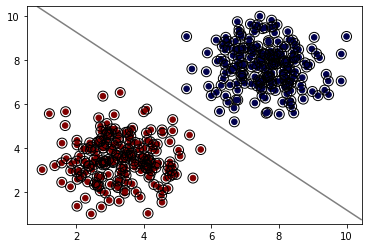

In [16]:
plot_svm_boundary(grid_model.best_estimator_, X, y)

### Regression - Concrete Slump dataset
* https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test

In [17]:
path = '../../Github/Python-Data-Science/Data/'
df = pd.read_csv(path+'cement_slump.csv')
df.info()

# Input variables (7)(component kg in one M^3 concrete):
# * Cement
# * Slag
# * Fly ash
# * Water
# * SP
# * Coarse Aggr.
# * Fine Aggr.

# Output variables (3):
# * SLUMP (cm)
# * FLOW (cm)
# * **28-day Compressive Strength (Mpa)**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


In [18]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


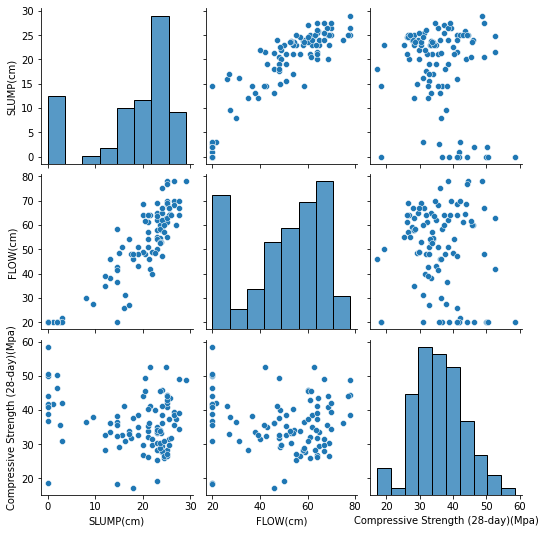

In [19]:
sns.pairplot(df[['SLUMP(cm)', 'FLOW(cm)', 'Compressive Strength (28-day)(Mpa)']])

<AxesSubplot:>

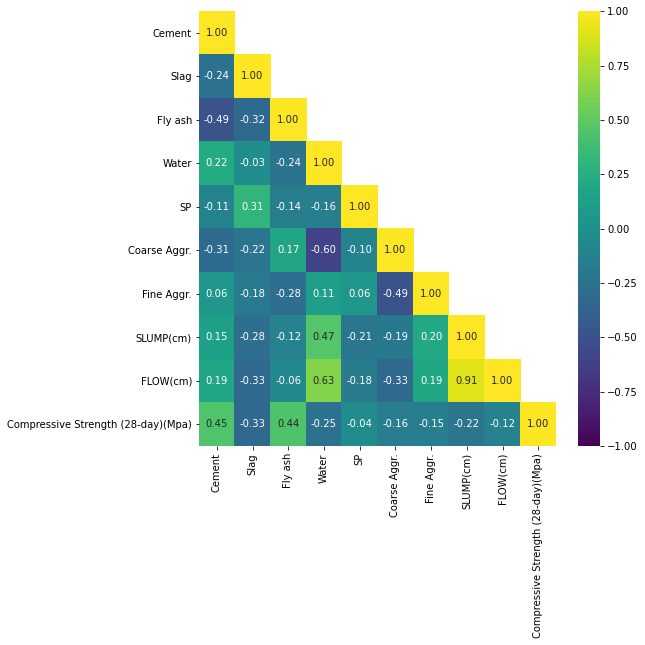

In [20]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', mask=np.triu(np.ones((df.shape[1],df.shape[1])), k=1),
            vmin=-1, vmax=1, cmap='viridis')

In [21]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [22]:
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [24]:
scaler = StandardScaler()
svr    = SVR()

In [25]:
operation = [('scaling', scaler),
             ('model', svr)]
pipe = Pipeline(operation)

In [26]:
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(np.std(y), np.mean(y))

6.695914838327133
7.798983090247368 36.03873786407767


In [27]:
# Tuning the parameter grid based on result
param_grid ={'model__C' : [1, 10, 100, 200, 300],
             'model__kernel' : ['linear', 'poly', 'rbf'],
             'model__gamma' : ['scale', 'auto'],
             'model__epsilon' : [0.0001, 0.001, 0.01, 0.1],
             'model__degree' : [2, 3, 4]}
# {'model__C': 100,
#  'model__degree': 2,
#  'model__epsilon': 0.001,
#  'model__gamma': 'scale',
#  'model__kernel': 'rbf'}
#  Test RMSE = 2.9

# param_grid = {'model__C':[0.001,0.01,0.1,0.5,1],
#               'model__kernel':['linear','rbf','poly'],
#               'model__gamma':['scale','auto'],
#               'model__epsilon':[0,0.01,0.1,0.5,1,2],
#               'model__degree':[2,3,4]}

# {'model__C': 1,
#  'model__degree': 2,
#  'model__epsilon': 2,
#  'model__gamma': 'scale',
#  'model__kernel': 'linear'}
#  Test RMSE = 3.2

grid_model = GridSearchCV(pipe, param_grid)
grid_model.fit(X_train, y_train)
grid_model.best_params_

{'model__C': 100,
 'model__degree': 2,
 'model__epsilon': 0.0001,
 'model__gamma': 'scale',
 'model__kernel': 'rbf'}

In [28]:
y_pred = grid_model.best_estimator_.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(np.std(y), np.mean(y))

2.993164759212707
7.798983090247368 36.03873786407767


<AxesSubplot:xlabel='Compressive Strength (28-day)(Mpa)'>

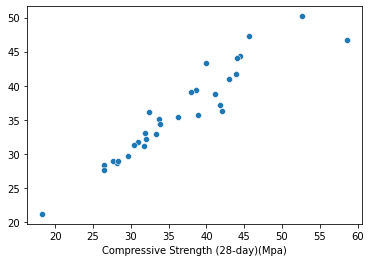

In [29]:
sns.scatterplot(x=y_test, y=y_pred)

2.8607304579381725
7.798983090247368 36.03873786407767


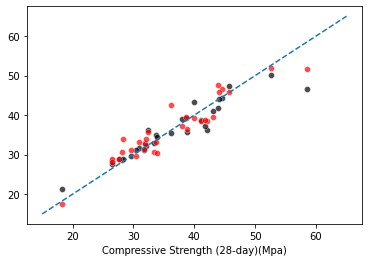

In [30]:
# LOL! Linear Regression model gives a better result w/o any feature engineering/ scaling

from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred_lin)))
print(np.std(y), np.mean(y))

sns.scatterplot(x=y_test, y=y_pred, color='black', alpha=0.7)
sns.scatterplot(x=y_test, y=y_pred_lin, color='red', alpha=0.7)
plt.plot([15,65], [15,65], ls='--')

### Regression - Wine Fraud dataset

In [31]:
df = pd.read_csv(path+'wine_fraud.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  type                  6497 non-null   object 
dtypes: float64(11), object(2)
memory usage: 660.0+ KB


In [32]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [33]:
df['quality'].value_counts()       # imbalance - precision/recall will be telling

Legit    6251
Fraud     246
Name: quality, dtype: int64

In [34]:
6251/(6251+246)                    # naive model will give 96% accuracy

0.9621363706325997

<AxesSubplot:xlabel='type', ylabel='count'>

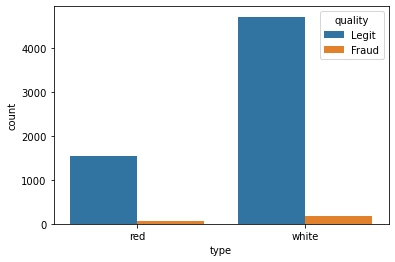

In [35]:
sns.countplot(data=df, x='type', hue='quality')

In [36]:
print(df.groupby(by=['type', 'quality']).count()['alcohol'])
print(f'%age of Fraudulent wines = red : {63/1536:.4f} and white :{183/4715:.4f}')

type   quality
red    Fraud        63
       Legit      1536
white  Fraud       183
       Legit      4715
Name: alcohol, dtype: int64
%age of Fraudulent wines = red : 0.0410 and white :0.0388


In [37]:
df['fraud'] = df['quality'].map({'Legit':0, 'Fraud':1})

In [38]:
corr = df.corr()['fraud'].sort_values()
print(corr)
df.drop(columns='fraud', inplace=True)

free sulfur dioxide    -0.085204
citric acid            -0.061789
alcohol                -0.051141
residual sugar         -0.048756
total sulfur dioxide   -0.035252
sulphates              -0.034046
density                 0.016351
pH                      0.020107
fixed acidity           0.021794
chlorides               0.034499
volatile acidity        0.151228
fraud                   1.000000
Name: fraud, dtype: float64


<AxesSubplot:>

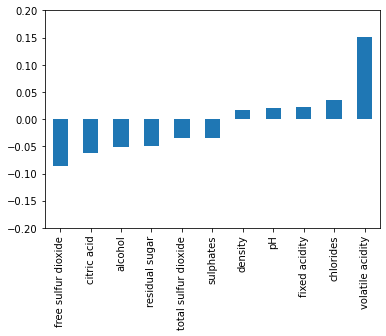

In [39]:
corr[:-1].plot(kind='bar', ylim=(-0.2,0.2))

<AxesSubplot:>

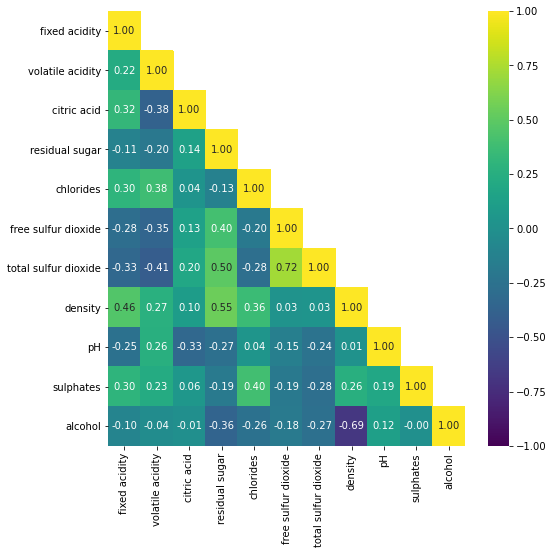

In [40]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', mask=np.triu(np.ones(df.corr().shape), k=1),
           cmap = 'viridis', vmin=-1, vmax=1)

In [41]:
data = df.copy()
data['type'] = pd.get_dummies(data['type'], drop_first=True)
data.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,0
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,0


In [42]:
X = data.drop(columns='quality')
y = data['quality']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [44]:
scaler = StandardScaler()
X_train_n = scaler.fit_transform(X_train)
X_test_n  = scaler.transform(X_test)

In [45]:
svc = SVC(class_weight='balanced', probability=True)

In [46]:
# param_grid = {'C':[.001, .01, .1, 1, 10],
#               'gamma':['scale', 'auto']}
# {'C': 10, 'gamma': 'scale'}

In [47]:
param_grid = {'C':[.001, .01, .1, 1],
              'gamma':['scale', 'auto']}
# {'C': 1, 'gamma': 'auto'}

In [48]:
grid_model = GridSearchCV(svc, param_grid)
grid_model.fit(X_train_n, y_train)
grid_model.best_params_

{'C': 1, 'gamma': 'auto'}

In [49]:
y_pred = grid_model.predict(X_test_n)

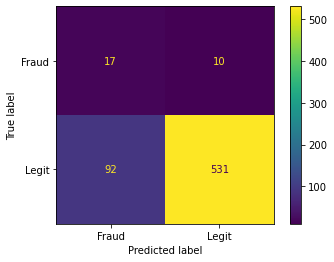

In [50]:
plot_confusion_matrix(grid_model, X_test_n, y_test)

In [51]:
print(y_test.value_counts())
print(confusion_matrix(y_test, y_pred))

Legit    623
Fraud     27
Name: quality, dtype: int64
[[ 17  10]
 [ 92 531]]


In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Fraud       0.16      0.63      0.25        27
       Legit       0.98      0.85      0.91       623

    accuracy                           0.84       650
   macro avg       0.57      0.74      0.58       650
weighted avg       0.95      0.84      0.88       650



### Tuning Threshold using F1-score

In [53]:
from sklearn.metrics import precision_recall_curve

y_pred_prob = grid_model.predict_proba(X_test_n)[:,0]
p, r, t = precision_recall_curve(y_test.map({'Legit':0, 'Fraud':1}),
                                            y_pred_prob)

In [54]:
fscore = 2*p*r/(p+r)
ix = fscore.argmax()
th_score = t[ix]
print(th_score, max(fscore))

y_pred_fs = [1 if i >= th_score else 0 for i in y_pred_prob]
print(confusion_matrix(y_test.map({'Legit':0, 'Fraud':1}), y_pred_fs))  
# Sensitivity is improved/ Recall is about the same

0.09791437791551445 0.31578947368421056
[[570  53]
 [ 12  15]]


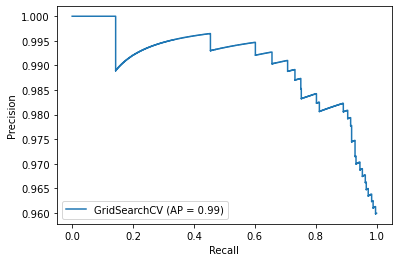

In [55]:
# Showing 'Legit' class's precision recall curve
plot_precision_recall_curve(grid_model, X_test_n, y_test)

The End